# **Proyek Predictive Analytics**
- **Nama:** Salsabila Mahiroh
- **Email:** Salsabilammm777@gmail.com
- **ID Dicoding:** salsabilammm


## **Business Understanding**

Problem Statement :
1. Fitur apa saja yang paling berpengaruh terhadap status pinjaman (loan_status)?
2. Bagaimana memilih model prediksi yang paling akurat untuk memprediksi apakah seseorang mengalami gagal bayar atau tidak dengan menggunakan beberapa model seperti KNN, Random Forest, dan XGBoost?

Goals atau tujuan berdasarkan problem statement :
1. Melakukan proses Exploratory Data Analysis (EDA) untuk mengetahui fitur atau variabel yang paling berkorelasi terhadap loan_status
2. Melakukan analisis dan membandingkan performa beberapa model prediksi seperti KNN, Random Forest, dan XGBoost untuk memilih model dengan kinerja terbaik dalam memprediksi status pinjaman berdasarkan riwayat calon peminjam.

## **Data Understanding**

Data Understanding digunakan untuk mendapatkan pemahaman dan informasi dari data yang digunakan dan menentukan kualitasnya. Kemudian data akan dilakukan explorasi sebelum melalui tahapan persiapan data (preparation)


- **Nama Dataset:** Credit Risk Dataset
- **Sumber Dataset:** Kaggle
- **Link Akses Dataset:** https://www.kaggle.com/datasets/laotse/credit-risk-dataset
- **Fitur :**

| No | Nama Fitur                   | Deskripsi                                                                |
| -- | ---------------------------- | ------------------------------------------------------------------------ |
| 1  | `person_age`                 | Usia pemohon pinjaman                                       |
| 2  | `person_income`              | Pendapatan tahunan pemohon                                               |
| 3  | `person_home_ownership`      | Status kepemilikan rumah                     |
| 4  | `person_emp_length`          | Lama masa kerja pemohon (dalam tahun)                                    |
| 5  | `loan_intent`                | Tujuan pinjaman  |
| 6  | `loan_grade`                 | Tingkat pinjaman                                    |
| 7  | `loan_amnt`                  | Jumlah pinjaman                                |
| 8  | `loan_int_rate`              | Suku bunga pinjaman                                        |
| 9  | `loan_status`                | Status pinjaman (fitur target): 0 = lancar, 1 = gagal bayar                   |
| 10 | `loan_percent_income`        | Persentase pinjaman terhadap pendapatan                                  |
| 11 | `cb_person_default_on_file`  | Riwayat default atau gagal bayar (YES/NO)                                      |
| 12 | `cb_person_cred_hist_length` | Durasi riwayat kredit (dalam tahun)                                      |

---
- **Dataset ini merupakan** dataset dengan metode klasifikasi biner, dataset ini digunakan untuk menganalisis risiko kredit dengan pendekatan klasifikasi. Tujuannya adalah memprediksi apakah seorang pemohon pinjaman memiliki risiko kredit "Tidak gagal bayar/non-default" (0) atau "Gagal Bayar/default" (1) berdasarkan data historis calon peminjam.


### **Import Library**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import files
import zipfile
import os
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay

### **Data Loading**

Pada bagian ini, file kaggle.json di upload untuk autentikasi ke kaggle, kemudian API key disalin ke direktori yang tepat. Dataset credit-risk-dataset diunduh dan diekstrak, kemudia dimuat kedalam variabel df dan membaca menggunakan pandas serta menampilkan lima baris pertama yang akan di tampilkan

In [2]:
# upload fie json
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"salsabilamahiroh","key":"83f2c616a0acffeee5c38d0142429ba0"}'}

In [3]:
# Setup API key agar bisa akses Kaggle Dataset
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset dari Kaggle
!kaggle datasets download -d laotse/credit-risk-dataset

# Unzip file dataset
!unzip credit-risk-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/laotse/credit-risk-dataset
License(s): CC0-1.0
  0% 0.00/368k [00:00<?, ?B/s]
100% 368k/368k [00:00<00:00, 660MB/s]
Archive:  credit-risk-dataset.zip
  inflating: credit_risk_dataset.csv  


In [4]:
# membaca file csv
df = pd.read_csv("credit_risk_dataset.csv")

# menampilkan 5 baris pertama
df.head(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


### **Exploratory Data Analysis (EDA)**

#### **Exploratory Data Analysis - Memahami struktur & karakteristik data**:

Pada tahap ini EDA digunakan untuk, memahami struktur dan karakteristik data (data understanding) yang digunakan untuk mengenali tipe data, mendeteksi nilai yang hilang atau duplikat, melihat adanya outlier, dsb. Tujuannya sebagai dasar dalam pengambilan keputusan analisis selanjutnya.


In [5]:
# cek informasi dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


**Insight :**
- Terdapat 4 kolom dengan tipe object, yaitu person_home_ownership, loan_intent, loan_grade, dan cb_person_default_on_file
- Terdapat 3 kolom numerik dengan tipe data float64 yaitu  person_emp_length, loan_int_rate, dan loan_percent_income  
- Terdapat 5 kolom numerik dengan tipe data int64 yaitu person_age, person_income, loan_amnt, loan_status, cb_person_cred_hist_length
- Terdapat fitur kategorikal biner yang direpresentasikan dengan integer yaitu loan_status sebagai fitur target, yang memiliki representasi 0 = tidak gagal bayar dan 1 = gagal bayar

In [6]:
# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [7]:
# Menampilkan jumlah baris dan kolom dalam bentuk tuple
df.shape

(32581, 12)

**Insight :**

Dataset ini memiliki 32.581 data dan memiliki 12 kolom, 4 kolom kategori dan 8 kolom numerik (1 sebagai kolom target)

In [8]:
# Menampilkan jumlah nilai unik di setiap kolom
df.nunique()

,0
person_age,58
person_income,4295
person_home_ownership,4
person_emp_length,36
loan_intent,6
loan_grade,7
loan_amnt,753
loan_int_rate,348
loan_status,2
loan_percent_income,77


In [9]:
# Menampilkan missing values
df.isna().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


**Insight :**

Kolom person_emp_length dan loan_int_rate memiliki missing value, sehingga nantinya data akan dibersihkan pada tahap Data Preparation

In [10]:
# Menampilkan data duplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  165


**Insight :**

Data ini memiliki duplikasi data sebanyak 165, sehingga nantinya akan dibersihkan pada tahap Data Preparation dengan menghapus duplikasi data tersebut .



Pengecekan outlier pada fitur numerik akan di pilih terlebih dahulu, karena fitur loan_status adalah fitur target, maka fitur tersebut tidak perlu di ikut sertakan

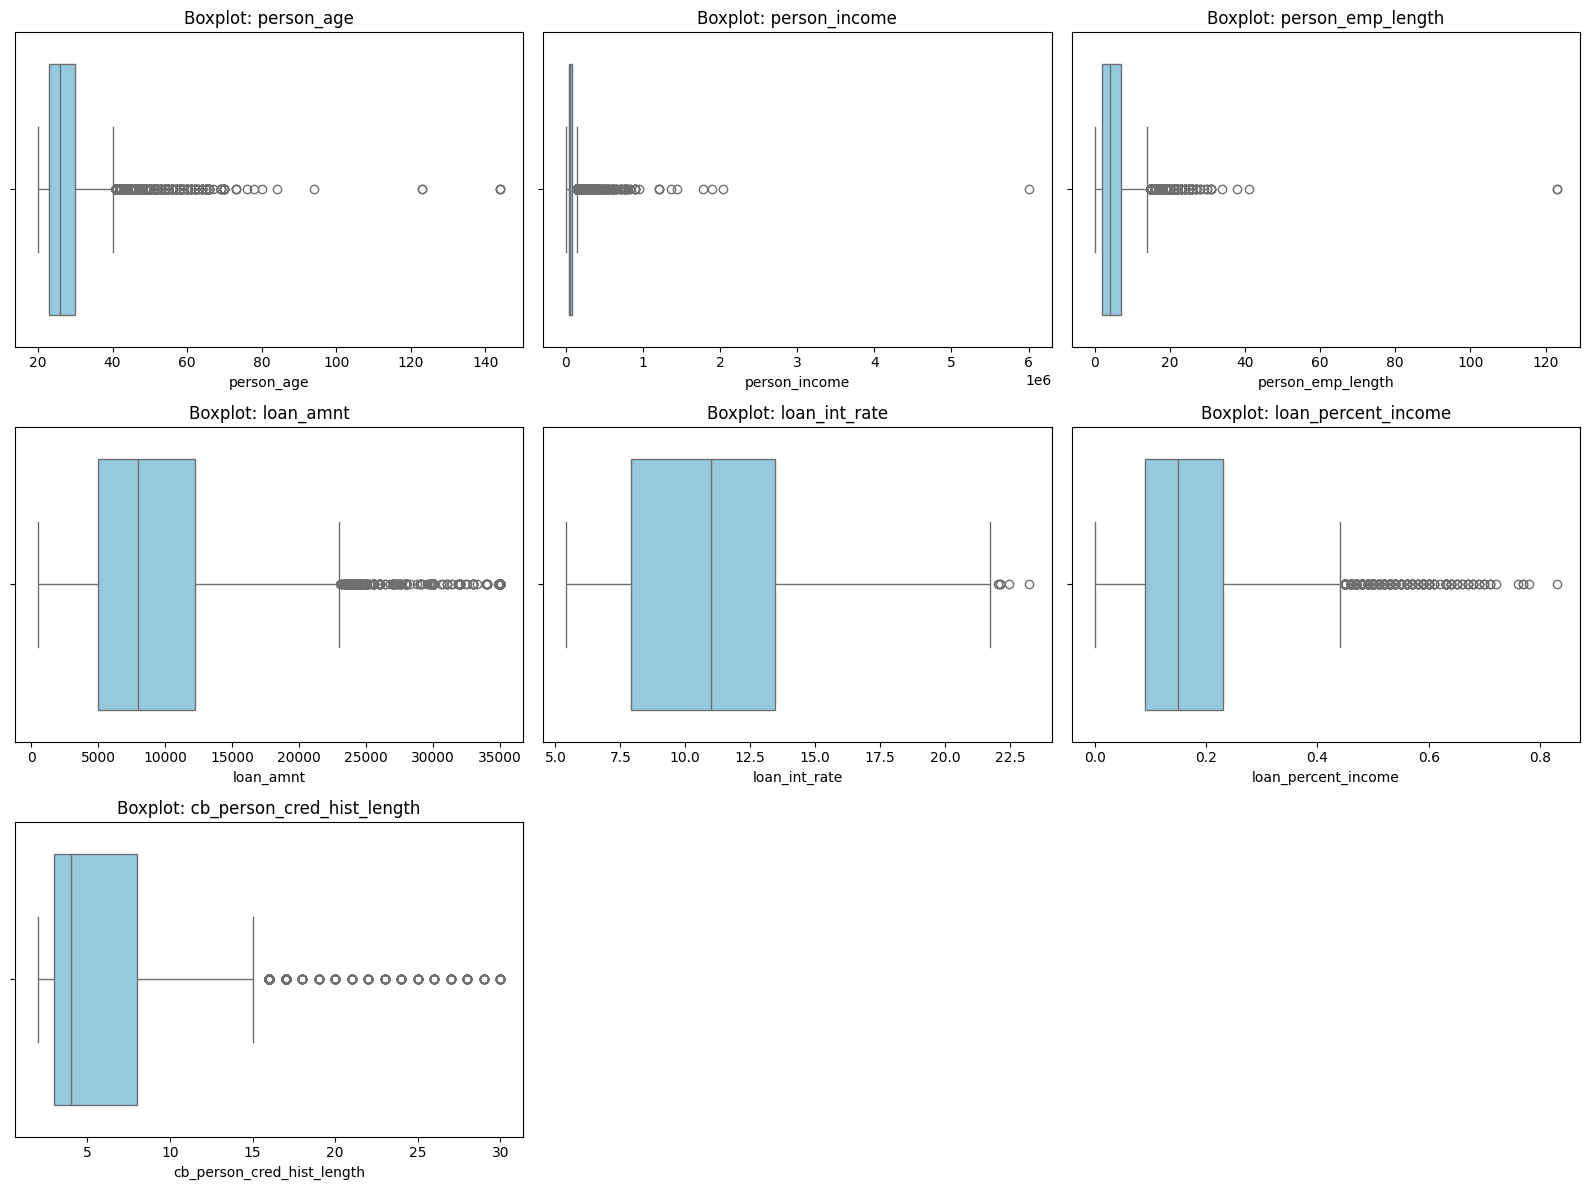

In [11]:
# cek data numerik yang memiliki outlier dengan boxplot
# Daftar fitur numerik yang relevan untuk pengecekan outlier
fitur_numerik = [
    'person_age',
    'person_income',
    'person_emp_length',
    'loan_amnt',
    'loan_int_rate',
    'loan_percent_income',
    'cb_person_cred_hist_length'
]

# Plot boxplot untuk masing-masing fitur numerik
plt.figure(figsize=(16, 12))
for i, col in enumerate(fitur_numerik):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot: {col}')
    plt.tight_layout()


**Insight :**

Masing-masing fitur numerik memiliki outlier yang dapat mempengaruhi hasil prediksi atau pemodelan, sehingga outlier ini akan di tangani dan dibersihkan pada tahap Data Preparation

#### **Exploratory Data Analysis - Univariate Analysis**

Pada tahap Univariate Analysis, dilakukan analisis distribusi untuk fitur kategorikal dengan menghitung jumlah dan persentase kategori, serta divisualisasikan dengan diagram batang. Sedangkan untuk fitur numerik distribusi data divisualisasikan menggunakan histogram.

In [12]:
# membagi fitur numerik dan kategori
fitur_numerik = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'loan_status']
fitur_kategori = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

***Fitur Kategori***

                       jumlah sampel  persentase
person_home_ownership                           
RENT                           16446        50.5
MORTGAGE                       13444        41.3
OWN                             2584         7.9
OTHER                            107         0.3


<Axes: title={'center': 'person_home_ownership'}, xlabel='person_home_ownership'>

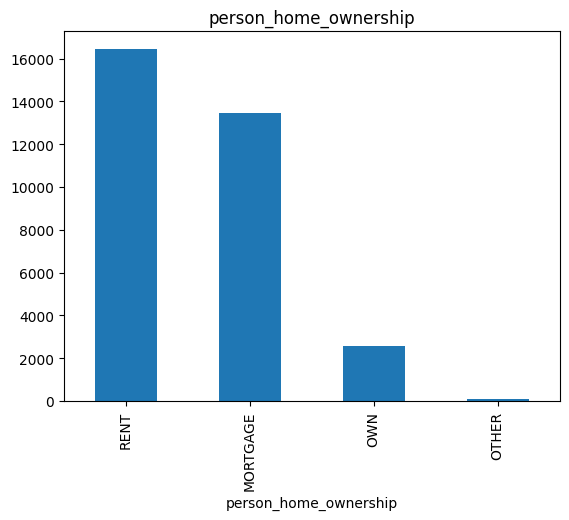

In [13]:
# fitur person_home_ownership
feature = fitur_kategori[0]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)

**Insight :**

Berdasarkan informasi pada fitur person_home_ownership terdapat 4 kategori kepemilikan tempat tinggal peminjam, Rent (sewa) menduduki jumlah tertinggi, disusul mortgage (hipotek), own (milik sendiri), dan other (lainnya).

                   jumlah sampel  persentase
loan_intent                                 
EDUCATION                   6453        19.8
MEDICAL                     6071        18.6
VENTURE                     5719        17.6
PERSONAL                    5521        16.9
DEBTCONSOLIDATION           5212        16.0
HOMEIMPROVEMENT             3605        11.1


<Axes: title={'center': 'loan_intent'}, xlabel='loan_intent'>

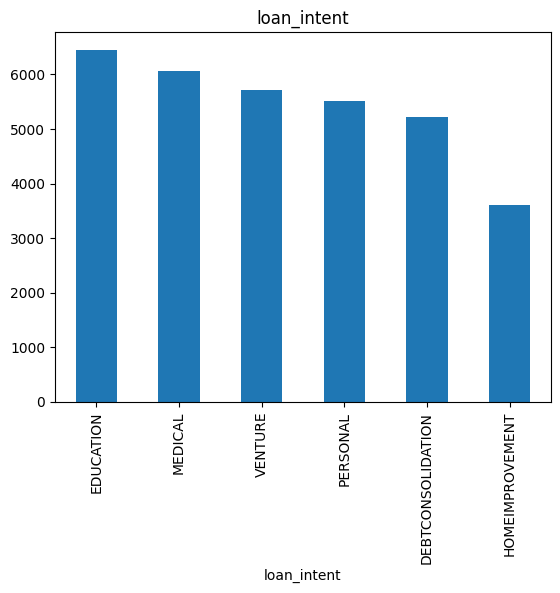

In [14]:
# fitur loan_intent
feature = fitur_kategori[1]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)


**Insight :**

Berdasarkan informasi dari deskripsi variabel, fitur loan_intent terdiri dari 6 tujuan peminjaman, tujuan peminjam yang paling banyak jatuh kepada education, disusul medical, venture, personal, debtconsolidation, dan paling sedikit adalah homeimprovement

            jumlah sampel  persentase
loan_grade                           
A                   10777        33.1
B                   10451        32.1
C                    6458        19.8
D                    3626        11.1
E                     964         3.0
F                     241         0.7
G                      64         0.2


<Axes: title={'center': 'loan_grade'}, xlabel='loan_grade'>

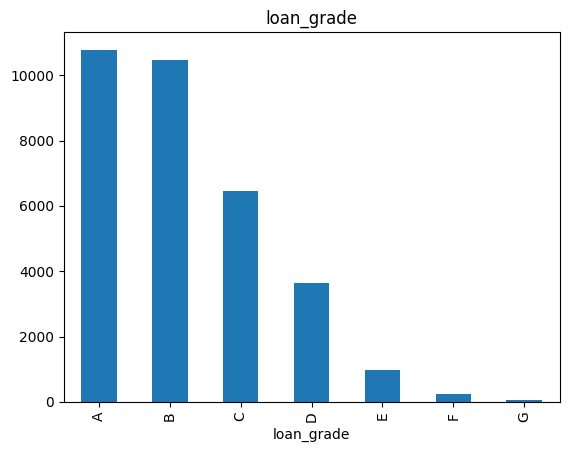

In [15]:
# fitur loan_grade
feature = fitur_kategori[2]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)


**Insight :**

Terdapat 7 kategori pada fitur loan_grade, secara berurutan dari jumlah yang paling banyak yaitu dimulai dari grade A, B, C, D, E, F, hingga paling sedikit adalah G

                           jumlah sampel  persentase
cb_person_default_on_file                           
N                                  26836        82.4
Y                                   5745        17.6


<Axes: title={'center': 'cb_person_default_on_file'}, xlabel='cb_person_default_on_file'>

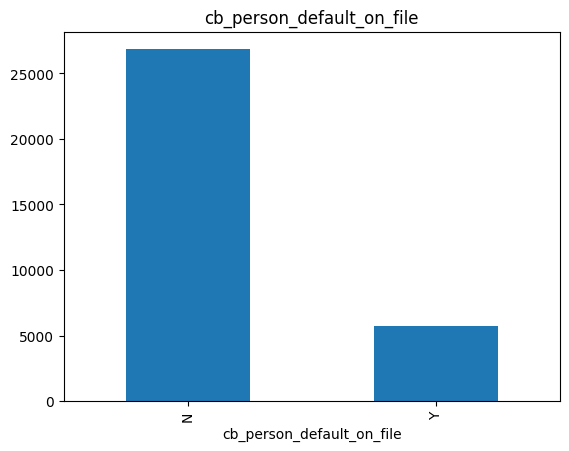

In [16]:
# fitur cb_person_default_on_file
feature = fitur_kategori[3]
count = df[feature].value_counts()
percent = 100 * df[feature].value_counts(normalize=True)
summary = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(summary)
count.plot(kind='bar', title=feature)



**Insight :**

Berdasarkan deskripsi variabel, terdapat 2 kategori N dan Y. Variabel "N" memiliki jumlah sampel/presentase paling tinggi di banding "Y", artinya terdapat sedikit yang memiliki riwayat default (gagal bayar) .

**Insight :**

***Fitur Numerik***

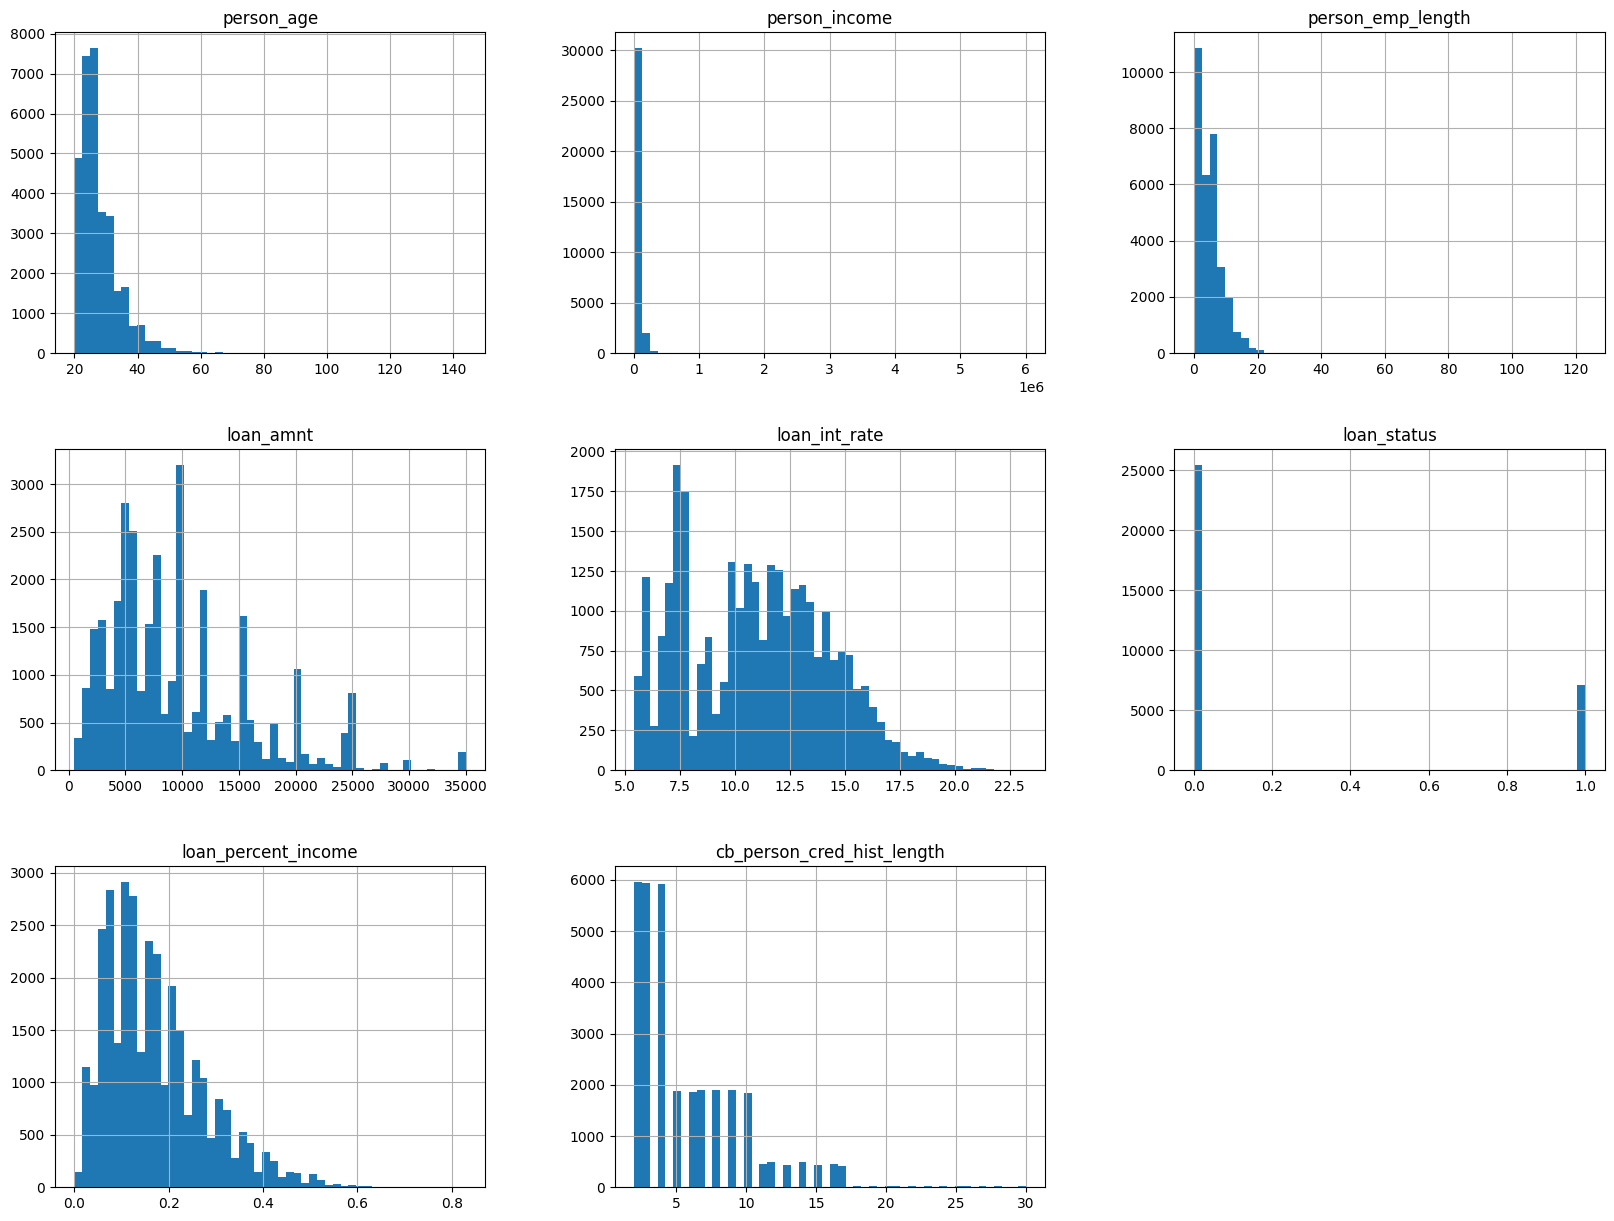

In [17]:
# melihat distribusi histogram fitur numerik
df.hist(bins=50, figsize=(20,15))
plt.show()

**Insight :**

Berdasarkan distribusi fitur numerik, khususnya pada fitur loan_status yang sebagai target, bahwa Mayoritas pinjaman berstatus lancar (0),dan hanya sebagian kecil yang gagal bayar (1). Artinya, sebagian besar peminjam dalam data ini berhasil membayar pinjamannya dengan lancar, sementara hanya sebagian kecil yang mengalami gagal bayar.

#### **Exploratory Data Analysis - Multivariate Analysis**

Pada tahap Multivariate Analysis, dilakukan analisis untuk memahami hubungan antar fitur dalam dataset, khususnya terhadap kolom target (loan_status). Untuk fitur kategorikal, analisis dilakukan dengan menggunakan diagram batang untuk menunjukkan distribusi jumlah atau persentase loan_status berdasarkan masing-masing kategori. Hal ini bertujuan untuk melihat apakah terdapat kategori tertentu yang lebih berisiko mengalami gagal bayar. Sementara itu, untuk fitur numerik, hubungan antar fitur divisualisasikan menggunakan pairplot, yang menampilkan scatter plot dan distribusi antar pasangan fitur. Selain itu, digunakan juga heatmap korelasi untuk menunjukkan tingkat hubungan (korelasi) antar fitur numerik dalam bentuk matriks warna, termasuk korelasinya terhadap loan_status.

***Fitur Kategori***


--- Distribusi Loan Status berdasarkan person_home_ownership ---


loan_status,0,1
person_home_ownership,,
MORTGAGE,87.4,12.6
OTHER,69.2,30.8
OWN,92.5,7.5
RENT,68.4,31.6


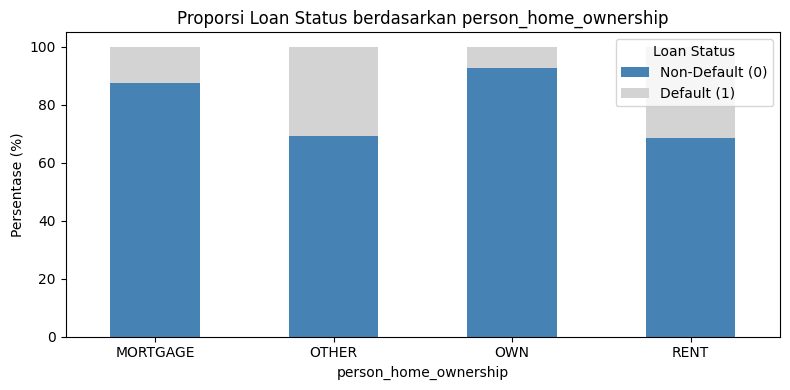


--- Distribusi Loan Status berdasarkan loan_intent ---


loan_status,0,1
loan_intent,,
DEBTCONSOLIDATION,71.4,28.6
EDUCATION,82.8,17.2
HOMEIMPROVEMENT,73.9,26.1
MEDICAL,73.3,26.7
PERSONAL,80.1,19.9
VENTURE,85.2,14.8


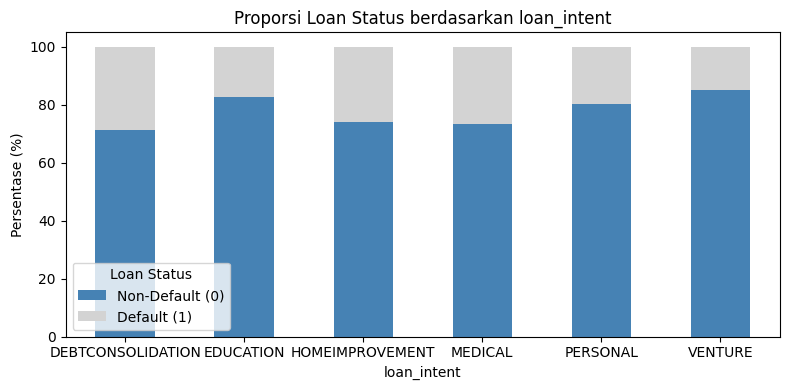


--- Distribusi Loan Status berdasarkan loan_grade ---


loan_status,0,1
loan_grade,,
A,90.0,10.0
B,83.7,16.3
C,79.3,20.7
D,41.0,59.0
E,35.6,64.4
F,29.5,70.5
G,1.6,98.4


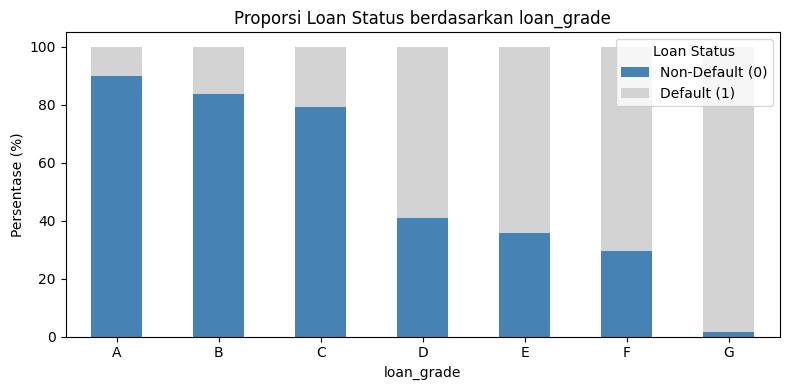


--- Distribusi Loan Status berdasarkan cb_person_default_on_file ---


loan_status,0,1
cb_person_default_on_file,,
N,81.6,18.4
Y,62.2,37.8


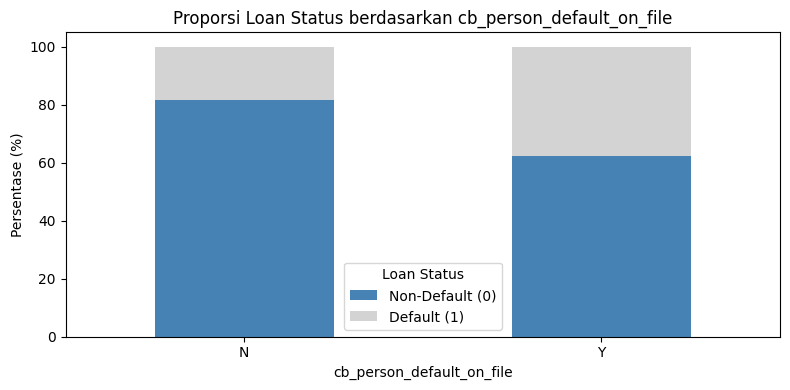

In [18]:
# Daftar fitur kategorikal
fitur_kategori = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Crosstab dan visualisasi
for col in fitur_kategori:
    print(f"\n--- Distribusi Loan Status berdasarkan {col} ---")
    ct = pd.crosstab(df[col], df['loan_status'], normalize='index') * 100
    display(ct.round(1))
    # Ganti colormap dengan daftar warna spesifik untuk setiap kategori loan_status
    ct.plot(kind='bar', stacked=True, figsize=(8, 4), color=['steelblue', 'lightgray'])
    plt.title(f'Proporsi Loan Status berdasarkan {col}')
    plt.ylabel('Persentase (%)')
    plt.legend(title='Loan Status', labels=['Non-Default (0)', 'Default (1)'])
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

**Insight :**
- Pada fitur person_home_ownership, presentase "gagal bayar" terhadap kepemilikian rumah sendiri (own) disusul oleh Mortgage, yang menunjukkan bahwa keduanya memiliki potensi untuk tidak gagal bayar. Sedangkan Rent dan Other memiliki risiko untuk gagal bayar. Hal ini fitur person_home_ownership memiliki pengaruh terhadap loan_status
- Pada fitur loan_intent, presentase "gagal bayar" terhadap Debtconsolidation, Homeimprovement, dan Medical lebih tinggi dibandingkan Venture, Education, dan Personal. Hal ini menunjukkan memiliki sedikit pengaruh terhadap loan_status
- Pada fitur loan_grade, semakin tingginya tingkat grade (A-G) semakin tingginya presentase terhadap "gagal bayar" yang artinya, memiliki potensi sebagai gagal bayar saat ini. Hal ini fitur loan_grade sangat berpengaruh terhadap loan_status
- Fitur cb_person_default_on_file memiliki pengaruh kuat terhadap loan_status. Persentase gagal bayar lebih tinggi pada kategori "Y", menunjukkan bahwa riwayat gagal bayar di masa lalu berkorelasi positif dengan potensi gagal bayar saat ini.
- Kesimpulan, fitur kategori memiliki peran penting terhadap loan_status

***Fitur Numerik***

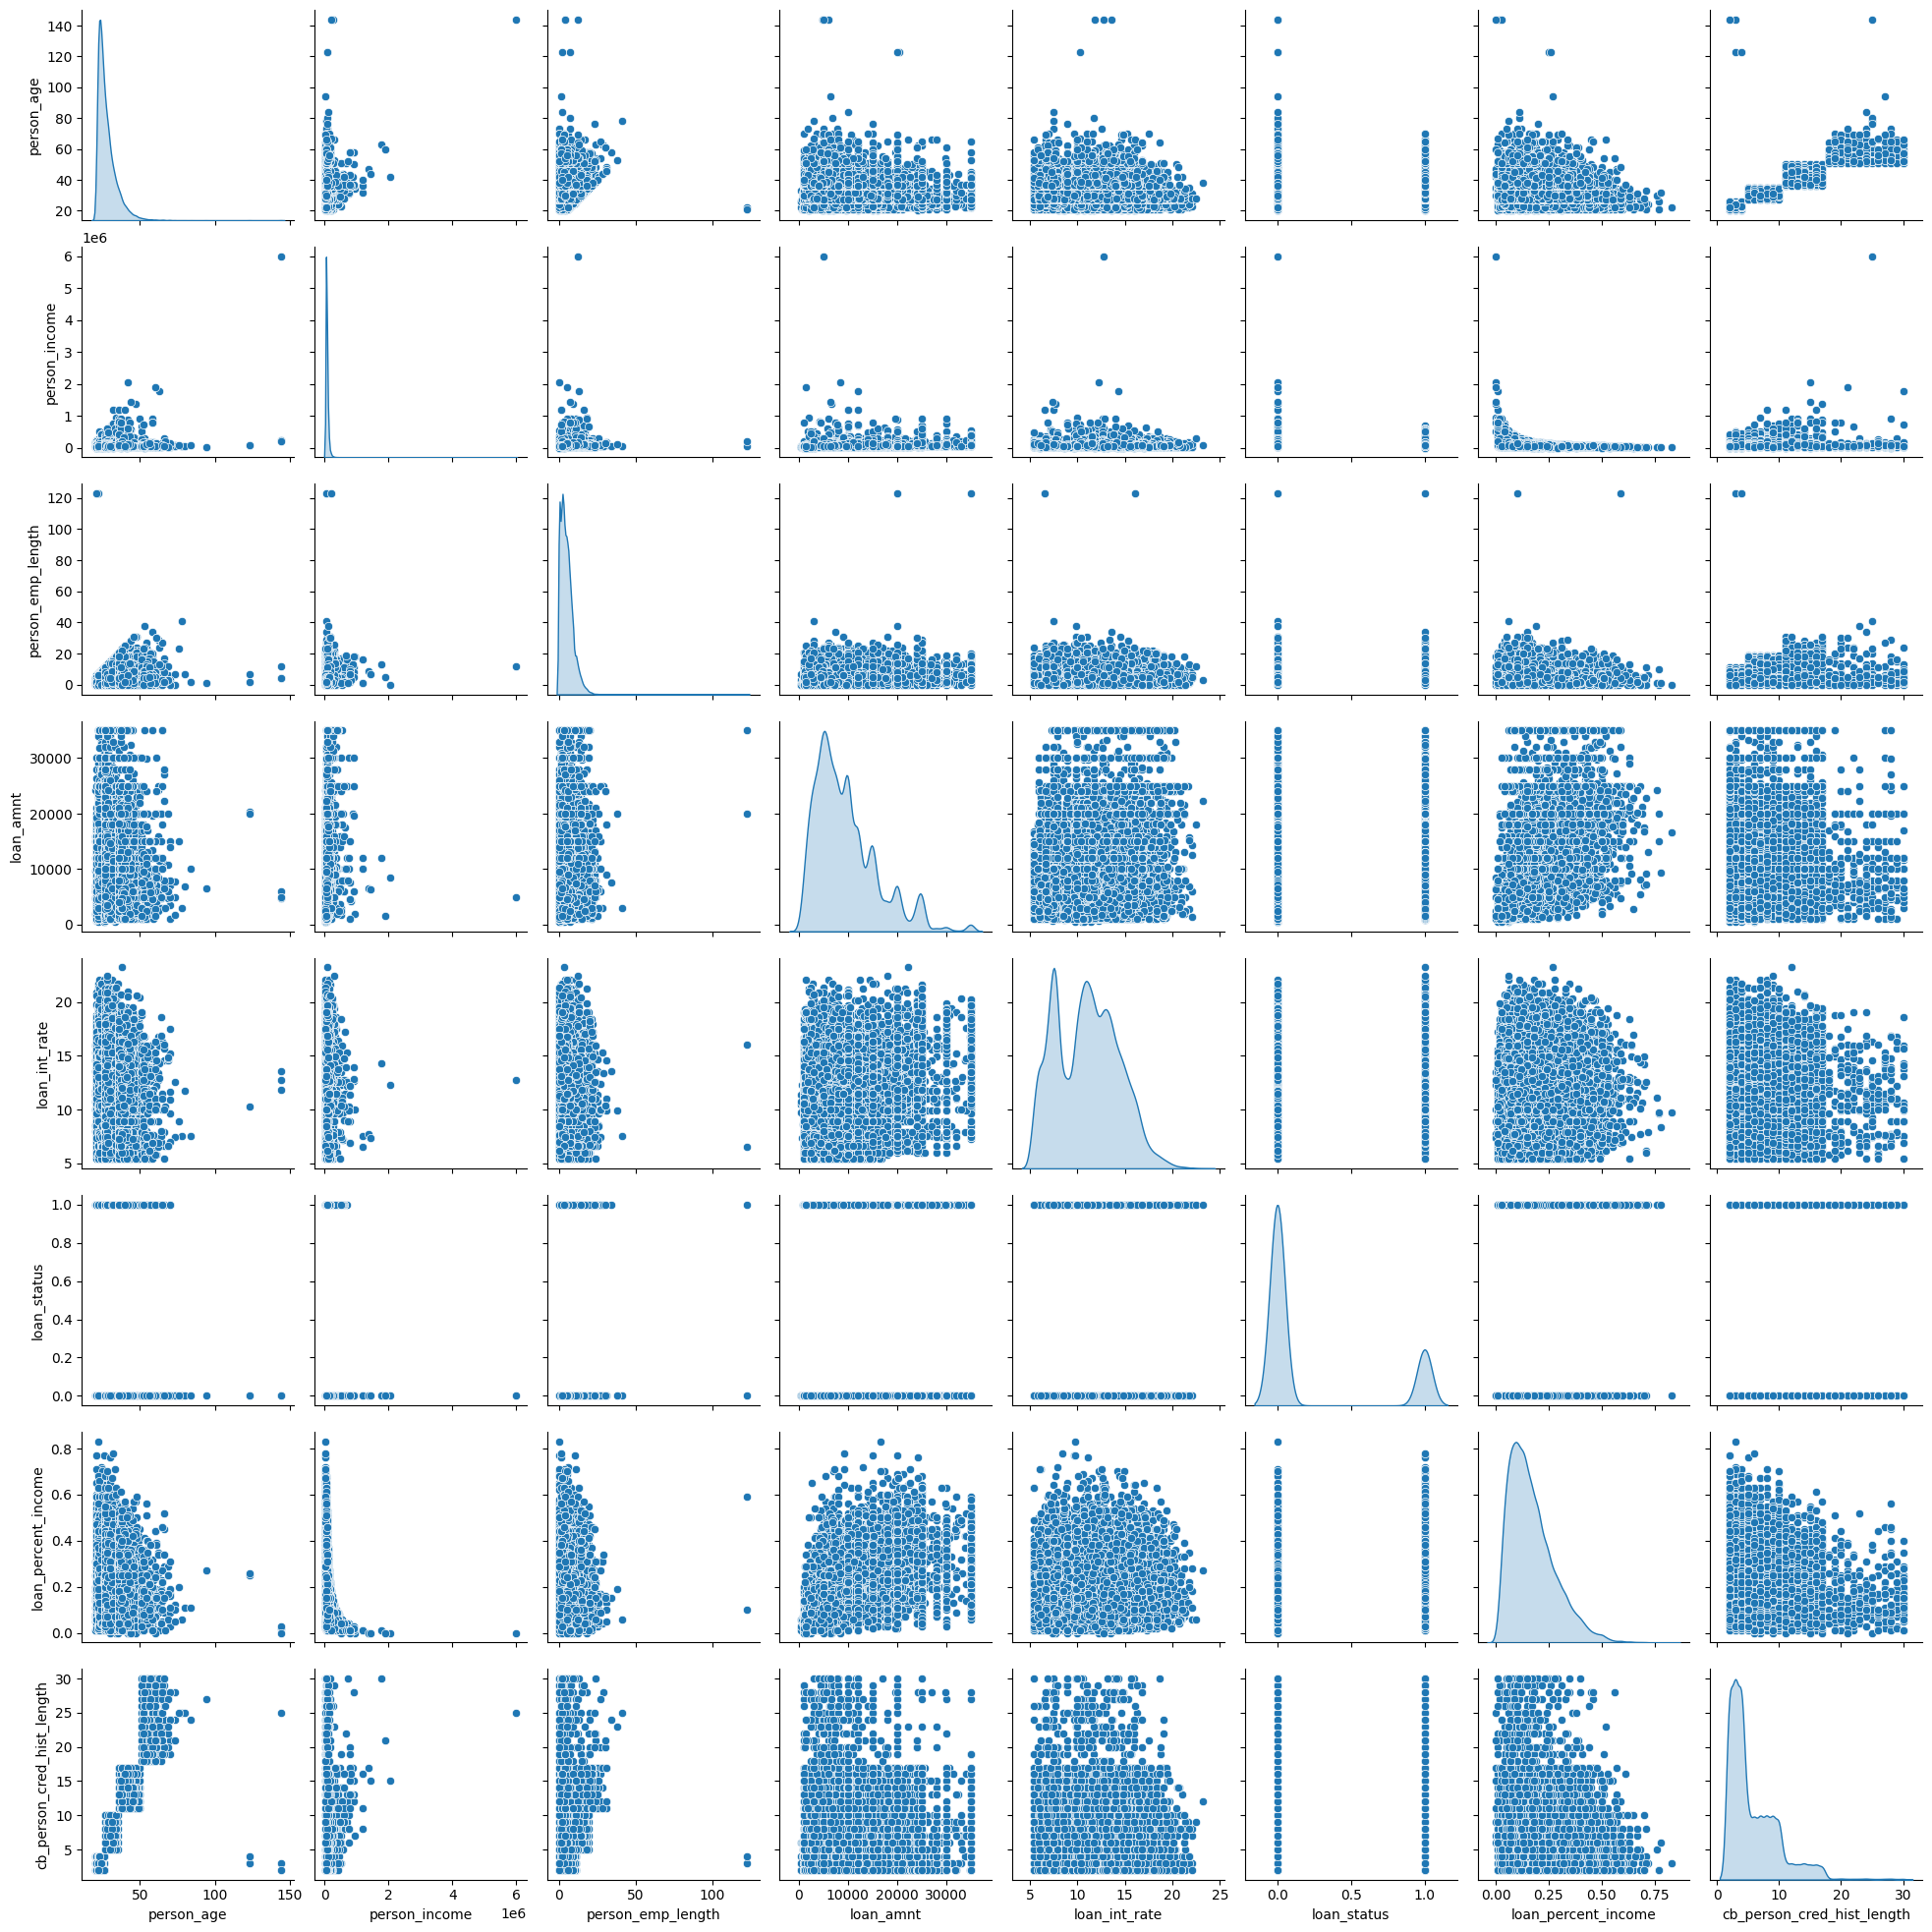

In [19]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df, diag_kind = 'kde')

**Insight :**

Berdasarkan visualisasi pairplot terlihat bahwa fitur loan_percent_income, loan_int_rate, dan person_income memiliki korelasi terhadap fitur loan_status. Sedangkan fitur lainnya memiliki korelasi yang lemah karena sebarannya tidak membentuk pola

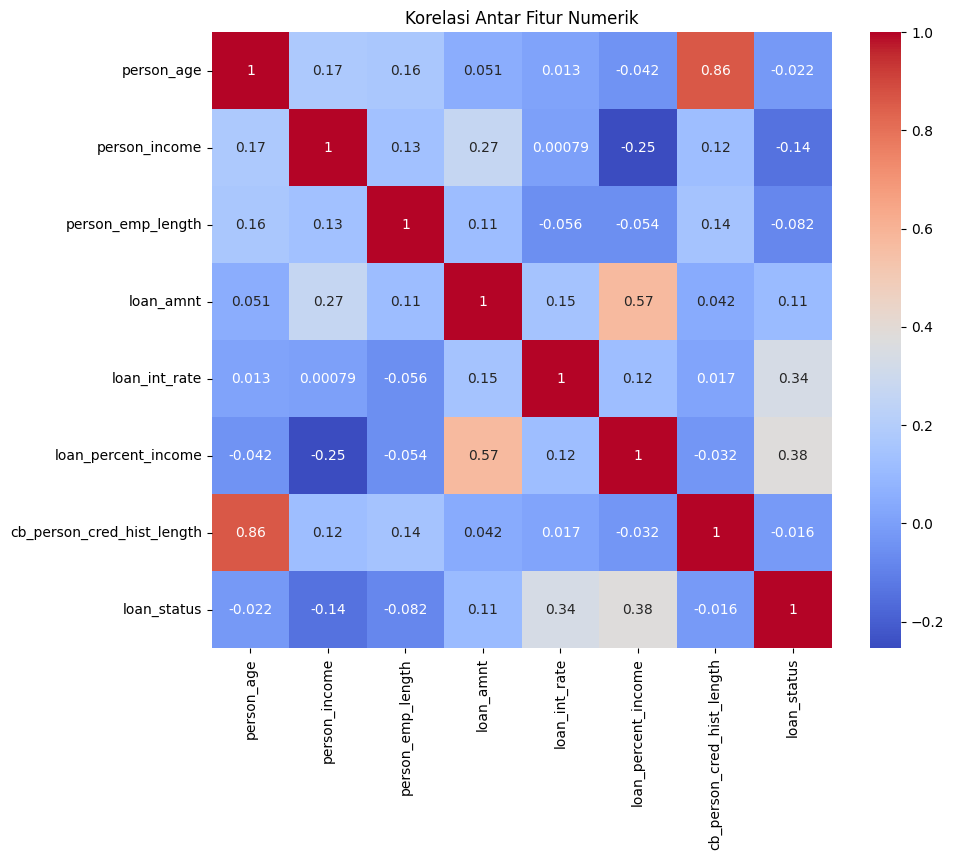

In [20]:
fitur_numerik = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'loan_percent_income',
    'cb_person_cred_hist_length', 'loan_status'
]

plt.figure(figsize=(10, 8))
sns.heatmap(df[fitur_numerik].corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi Antar Fitur Numerik")
plt.show()


**Insight :**
- korelasi loan_percent_income dengan loan_status adalah +0.38, yang artinya memiliki korelasi positif
- korelasi loan_int_rate dengan loan_status adalah +0.34, yang artinya memiliki korelasi positif
- korelasi loan_amnt dengan loan_status adalah +0.11, yang artinya memiliki korelasi sangat lemah
- korelasi person_income dengan loan_status adalah -0.14, yang artinya memiliki korelasi negatif lemah
- korelasi person_emp_length dengan loan_status adalah -0.082 , yang artinya memiliki korelasi sangat lemah
- korelasi person_age dengan loan_status adalah -0.022, yang artinya hampir tidak ada korelasi antar keduanya
- korelasi cb_person_cred_hist_length dengan loan_status adalah -0.016, yang artinya hampir tidak ada korelasi antar keduanya
- kesimpulan, fitur yang paling berkolerasi terhadap loan_status adalah loan_percent_income, loan_int_rate, dan person_income. Fitur numerik sisanya akan di tangani pada Data Preparation untuk menghapus fitur yang tidak memiliki korelasi dengan fitur target loan_status.

## **Data Preparation**

Setelah melakukan proses EDA dan menghasilkan insight untuk keputusan selanjutnya, maka kita akan mempersiapkan dan membersihkan data pada tahap Data Preparation agar bisa di proses untuk pemodelan dan evaluasi.

####***Drop Kolom***

Drop kolom yang tidak memiliki korelasi terhadap loan_status. Drop kolom fitur 'person_age', 'person_emp_length', 'loan_amnt', 'cb_person_cred_hist_length'

In [21]:
# Daftar fitur yang ingin di-drop
drop_kolom = ['person_age', 'person_emp_length', 'loan_amnt', 'cb_person_cred_hist_length']

# Drop kolom dari DataFrame
df = df.drop(columns=drop_kolom)

# Cek hasil
print("Kolom setelah di-drop:", df.columns)
df.head()

Kolom setelah di-drop: Index(['person_income', 'person_home_ownership', 'loan_intent', 'loan_grade',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file'],
      dtype='object')


,person_income,person_home_ownership,loan_intent,loan_grade,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file
0,59000,RENT,PERSONAL,D,16.02,1,0.59,Y
1,9600,OWN,EDUCATION,B,11.14,0,0.10,N
2,9600,MORTGAGE,MEDICAL,C,12.87,1,0.57,N
3,65500,RENT,MEDICAL,C,15.23,1,0.53,N
4,54400,RENT,MEDICAL,C,14.27,1,0.55,Y


####***Menangani missing value***

In [22]:
# Menampilkan missing values kembali setelah drop kolom
df.isna().sum()

,0
person_income,0
person_home_ownership,0
loan_intent,0
loan_grade,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0
cb_person_default_on_file,0


Karena pada fitur loan_int_rate memiliki missing value sebanyak 3.116 dari 32.581 maka missing value ini akan di tangani dengan cara imputasi

In [23]:
# menangani missing value dengan imputasi
df['loan_int_rate'] = df['loan_int_rate'].fillna(df['loan_int_rate'].median())

# periksa kembali missing value setelah imputasi
print("Missing values setelah imputasi:")
print(df.isna().sum())


Missing values setelah imputasi:
person_income                0
person_home_ownership        0
loan_intent                  0
loan_grade                   0
loan_int_rate                0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64


####***Menangani data duplikat***

In [24]:
# Mengecek jumlah data duplikat sebelum dihapus
print("Jumlah data duplikat sebelum dihapus:", df.duplicated().sum())

Jumlah data duplikat sebelum dihapus: 796


In [25]:
# Menghapus baris yang duplikat
df = df.drop_duplicates()

# Mengecek ulang jumlah data duplikat setelah dihapus
print("Jumlah data duplikat setelah dihapus:", df.duplicated().sum())

Jumlah data duplikat setelah dihapus: 0


####***Menangani Outlier***

Jumlah outlier pada kolom loan_percent_income: 641
Jumlah outlier pada kolom loan_int_rate: 58
Jumlah outlier pada kolom person_income: 1423


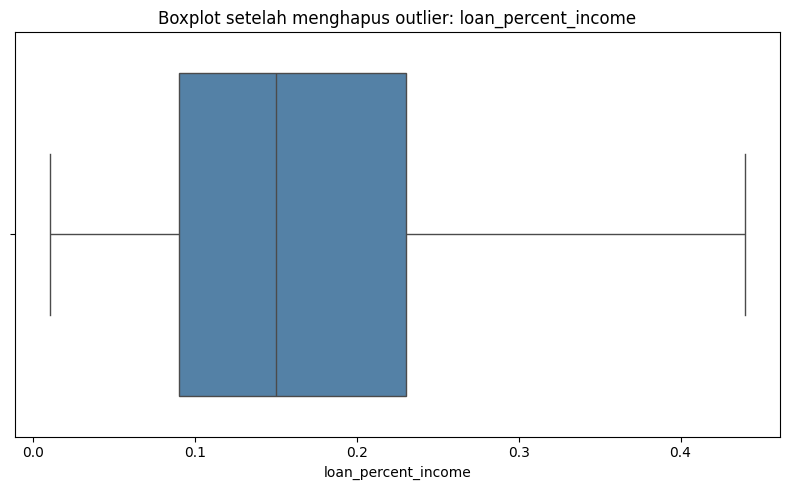

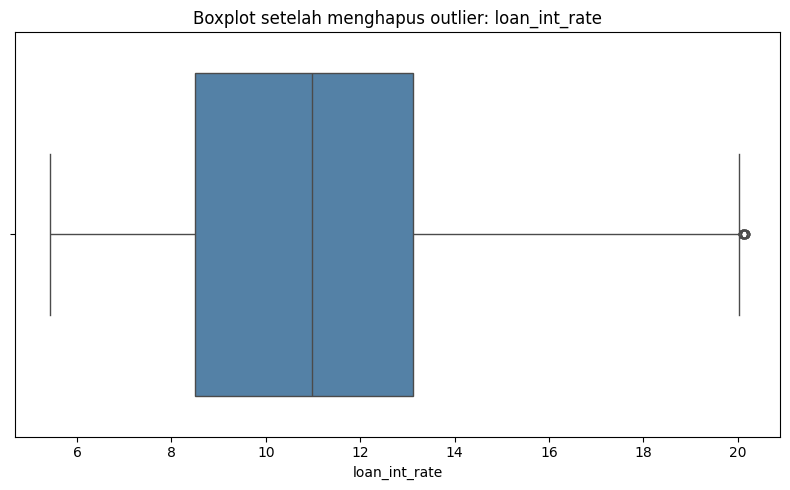

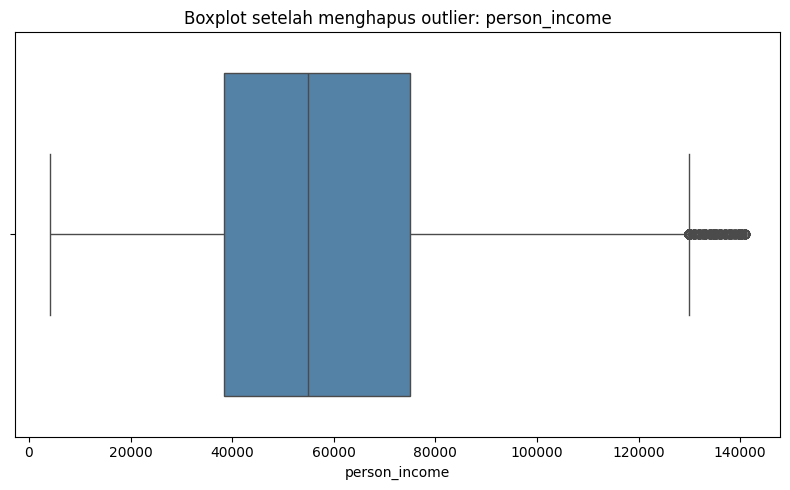

In [26]:
# Daftar kolom yang ingin ditangani outlier-nya
fitur_outlier = ['loan_percent_income', 'loan_int_rate', 'person_income']

# Tangani outlier dengan metode IQR
for col in fitur_outlier:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Tampilkan jumlah outlier sebelum dihapus
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Jumlah outlier pada kolom {col}: {outliers.shape[0]}")

    # Hapus outlier
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Visualisasi boxplot setelah outlier dihapus
for col in fitur_outlier:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[col], color='steelblue')
    plt.title(f'Boxplot setelah menghapus outlier: {col}')
    plt.tight_layout()
    plt.show()

fitur loan_status merupakan fitur numerik dan fitur target, sehingga fitur tersebut tidak perlu ditangani dalam hal outlier

####***Encoding fitur kategori***

In [27]:
# Fitur kategorikal yang akan di-encode
fitur_kategori = ['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file']

# Melakukan One-Hot Encoding pada fitur kategorikal dengan hasil numerik
df = pd.get_dummies(df, columns=fitur_kategori, drop_first=True, dtype=int)

# Menampilkan 5 baris pertama setelah encoding
print("DataFrame setelah One-Hot Encoding:")
display(df.head())


DataFrame setelah One-Hot Encoding:


,person_income,loan_int_rate,loan_status,loan_percent_income,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
1,9600,11.14,0,0.10,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0
5,9900,7.14,1,0.25,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
7,78956,11.11,1,0.44,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
8,83000,8.90,1,0.42,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
9,10000,14.74,1,0.16,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0


####***Train-test split***

In [28]:
# Pisahkan fitur (X) dan target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Split data menjadi data latih dan data uji (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan ukuran hasil split
print("Ukuran data training:", X_train.shape)
print("Ukuran data testing:", X_test.shape)


Ukuran data training: (23730, 18)
Ukuran data testing: (5933, 18)


Pembagian data dilakukan dengan train-test split dengan porsi pembagian 80% untuk data latih (training) dan 20% untuk data uji (testing)

####***Standarisasi***

In [29]:
# Menentukan fitur numerik
numerical_features = ['loan_percent_income', 'loan_int_rate', 'person_income']

# Normalisasi data numerik
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

## **Modelling**

####***K-Nearest Neighbor***

Model K-Nearest Neighbors dibangun menggunakan KNeighborsClassifier dari library scikit-learn dengan parameter n_neighbors=5, yang berarti model akan mempertimbangkan 5 tetangga terdekat untuk menentukan kelas dari sebuah data baru. Model ini kemudian dilatih (fit) menggunakan data pelatihan X_train dan y_train.

In [30]:
# Modelling K-Nearest Neighbor
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

####***Random Forest***

Model Random Forest dibangun menggunakan RandomForestClassifier dari scikit-learn. Dengan parameter n_estimators=100, berarti model menggunakan 100 pohon keputusan (decision trees). Parameter random_state=42 digunakan agar hasil model bersifat reproducible (konsisten setiap kali dijalankan). Model ini kemudian dilatih menggunakan data pelatihan X_train dan y_train.

In [31]:
# Modelling Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

####***XGboost***

Model XGBoost dibangun menggunakan XGBClassifier dengan parameter use_label_encoder=False, dan eval_metric='logloss' sebagai metrik evaluasi. Parameter random_state=42 digunakan untuk menjaga konsistensi hasil. Model ini kemudian dilatih menggunakan data pelatihan X_train dan y_train.

In [32]:
# Modelling XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [12:14:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

## **Evaluasi Model**

Setiap model (KNN, Random Forest, XGBoost) dievaluasi dengan metrik akurasi, f1-score, classification report, confusion matrix, dan ROC-AUC score. Visualisasi seperti kurva ROC dan confusion matrix digunakan untuk memahami kinerja model lebih lanjut.

--- Evaluasi Model: K-Nearest Neighbor ---
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.93      4668
           1       0.83      0.63      0.71      1265

    accuracy                           0.89      5933
   macro avg       0.87      0.80      0.82      5933
weighted avg       0.89      0.89      0.89      5933



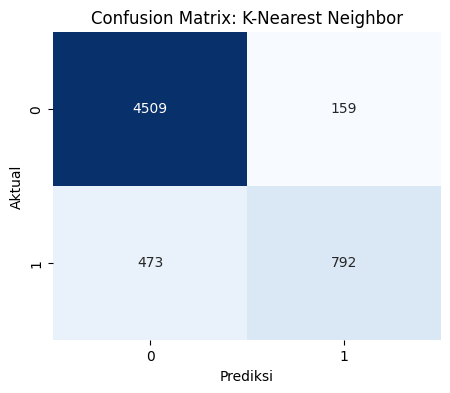

Akurasi : 0.8935
F1-score: 0.7148
ROC-AUC Score: 0.8709


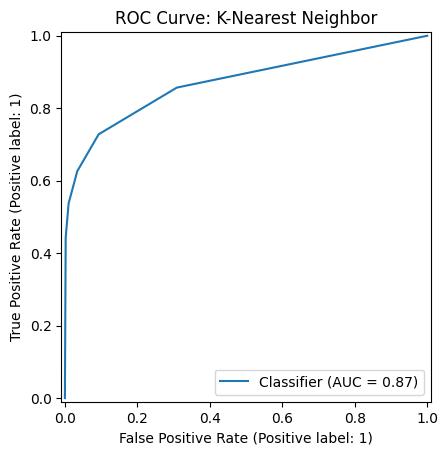

------------------------------
--- Evaluasi Model: Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4668
           1       0.90      0.68      0.77      1265

    accuracy                           0.92      5933
   macro avg       0.91      0.83      0.86      5933
weighted avg       0.91      0.92      0.91      5933



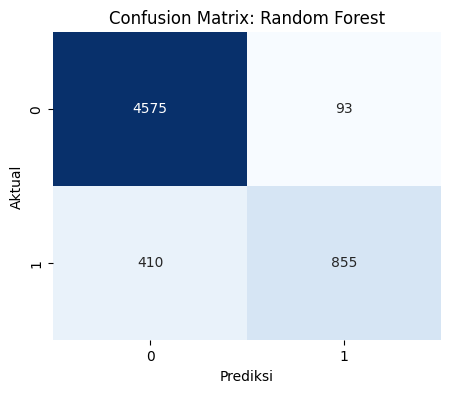

Akurasi : 0.9152
F1-score: 0.7727
ROC-AUC Score: 0.9150


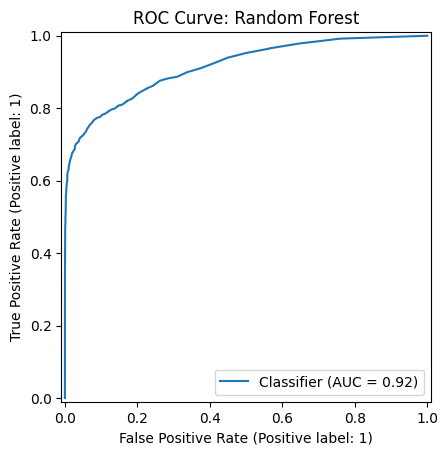

------------------------------
--- Evaluasi Model: XGBoost ---
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      4668
           1       0.92      0.69      0.79      1265

    accuracy                           0.92      5933
   macro avg       0.92      0.84      0.87      5933
weighted avg       0.92      0.92      0.92      5933



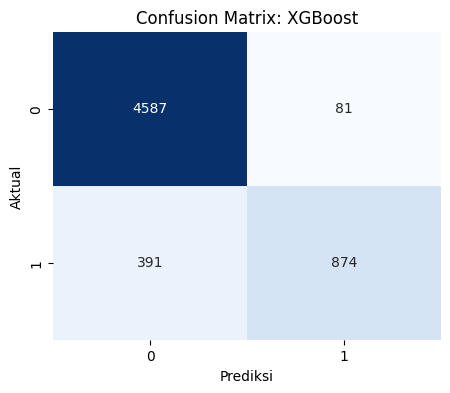

Akurasi : 0.9204
F1-score: 0.7874
ROC-AUC Score: 0.9405


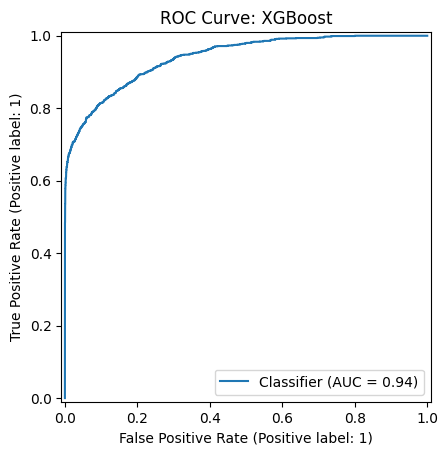

------------------------------


In [33]:
# Dictionary untuk menyimpan model
models = {
    'K-Nearest Neighbor': knn,
    'Random Forest': rf,
    'XGBoost': xgb
}

# Evaluasi masing-masing model
for name, model in models.items():
    print(f"--- Evaluasi Model: {name} ---")

    # Prediksi pada data uji
    y_pred = model.predict(X_test)

    # Classification report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.show()

    # Akurasi dan F1-score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    print(f"Akurasi : {accuracy:.4f}")
    print(f"F1-score: {f1:.4f}")

    # ROC-AUC Score dan Kurva ROC
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
        print(f"ROC-AUC Score: {auc:.4f}")
        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f'ROC Curve: {name}')
        plt.show()

    print("-" * 30)

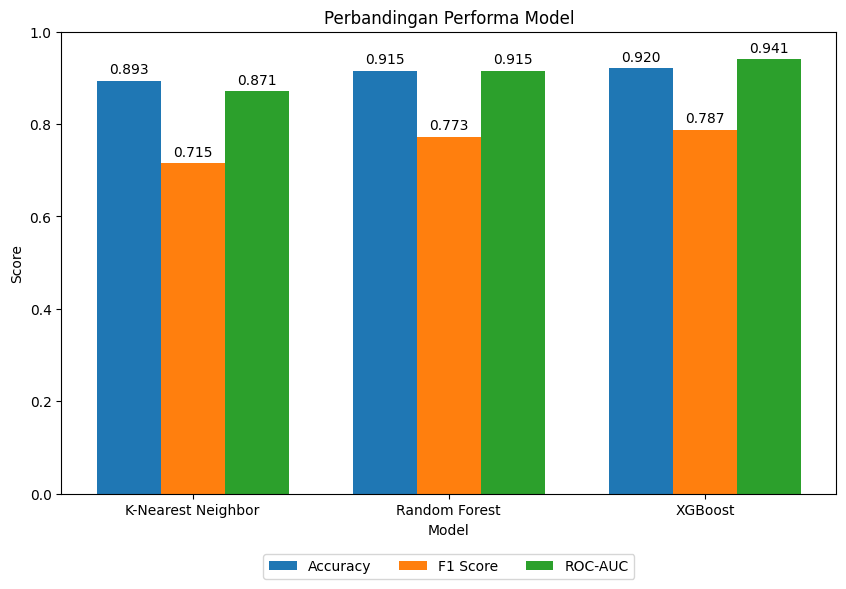

In [34]:
# Menyimpan metrik setiap model
model_names = []
accuracies = []
f1_scores = []
roc_aucs = []

for name, model in models.items():
    model_names.append(name)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_proba)
    else:
        auc = np.nan

    accuracies.append(accuracy)
    f1_scores.append(f1)
    roc_aucs.append(auc)

# Buat posisi bar chart
x = np.arange(len(model_names))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart akurasi, f1, dan roc-auc
bar1 = ax.bar(x - width, accuracies, width, label='Accuracy')
bar2 = ax.bar(x, f1_scores, width, label='F1 Score')
bar3 = ax.bar(x + width, roc_aucs, width, label='ROC-AUC')

# Label dan judul
ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Perbandingan Performa Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=3)

# Tambah nilai di atas bar
def add_values(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label
                    textcoords="offset points",
                    ha='center', va='bottom')

add_values(bar1)
add_values(bar2)
add_values(bar3)

plt.ylim(0, 1)
plt.show()

In [35]:
# Ambil 1 sampel data dari X_test dan y_test
sample = X_test.iloc[:1].copy()
true_value = y_test.iloc[:1].values[0]

# Buat dictionary awal dengan nilai aktual
pred_dict = {'y_true': [true_value]}

# Melakukan prediksi dengan masing-masing model dan menyimpan hasilnya
for name, model in models.items():
    prediksi = model.predict(sample).round(1)
    pred_dict['prediksi_' + name.replace(" ", "_")] = prediksi

# Tampilkan hasil prediksi dalam bentuk DataFrame
hasil_prediksi = pd.DataFrame(pred_dict)
display(hasil_prediksi)

,y_true,prediksi_K-Nearest_Neighbor,prediksi_Random_Forest,prediksi_XGBoost
0,1,1,1,1


# **🔍 Interprestasi Hasil dan Keterkaitam dengan problem statment & tujuan bisnis**


⭐**Problem statment 1** : Fitur apa saja yang paling berpengaruh terhadap status pinjaman (loan_status)?

**Goal 1** :  Melakukan proses Exploratory Data Analysis (EDA) untuk mengetahui fitur atau variabel yang paling berkorelasi terhadap loan_status

**Hasil & interprestasi** : Setelah melewati proses exploratory data - Multivariate analisis yaitu, untuk memahami hubungan antara dua atau lebih variabel pada data, dapat diperoleh bahwa fitur seperti ***person_income, person_home_ownership, loan_intent, loan_grade, loan_intent, loan_grade, loan_int_rate, loan_percent_income, cb_person_default_file*** memberikan dan menunjukan hubungan atau korelasi terhadap loan_status. Setelah mengetahui fitur yang berkolerasi terhadap loan_status, maka selanjutnya akan diproses dalam tahap Data Preparation untuk memilih dan menghapus fitur yang tidak diperlukan (tidak memiliki korelasi), sehingga dapat dilanjutkan ke tahap pemodelan untuk menghasilkan suatu prediksi.

⭐**Problem statment 2** : Bagaimana memilih model prediksi yang paling akurat untuk memprediksi apakah seseorang mengalami gagal bayar atau tidak dengan menggunakan beberapa model seperti KNN, Random Forest, dan XGBoost?

**Goal 2** :
Melakukan analisis dan membandingkan performa beberapa model prediksi seperti KNN, Random Forest, dan XGBoost untuk memilih model dengan kinerja terbaik dalam memprediksi status pinjaman berdasarkan riwayat calon peminjam.

**Hasil & interprestasi**: Setelah melakukan modelling dan melakukan evaluasi model prediksi menggunakan clasification report, confussion matrix, dan ROC-AUC diperoleh hasil :

| Model              | Accuracy | F1 Score | ROC-AUC |
| ------------------ | -------- | -------- | ------- |
| K-Nearest Neighbor | 0.893    | 0.715    | 0.871   |
| Random Forest      | 0.915    | 0.773    | 0.915   |
| XGBoost            | 0.920    | 0.787    | 0.941   |

 1. **K-Nearest Neighbor (KNN):**

- Akurasi cukup tinggi, namun bukan yang terbaik karena lebih rendah dari random forest dan XGBoost.
- F1 Score relatif rendah, mengindikasikan bahwa model kurang optimal dalam menangani ketidakseimbangan antara precision dan recall—khususnya untuk memprediksi nasabah gagal bayar.
- ROC-AUC juga merupakan yang paling rendah dari ketiga model, menunjukkan bahwa kemampuan diskriminatifnya terhadap dua kelas (gagal vs tidak gagal bayar) masih kurang.

2. **Random Forest:**
- Akurasi meningkat menunjukan model cukup baik
- F1 Score lebih baik dibanding KNN, menunjukkan keseimbangan yang lebih baik dalam mengklasifikasikan kelas minoritas (nasabah gagal bayar).
- ROC-AUC juga tinggi, menandakan performa baik dalam membedakan kedua kelas.

3. **XGBoost:**
- Memiliki performa terbaik di semua metrik evluasi
- F1 Score tertinggi, menunjukkan Keseimbangan precision & recall sangat baik
- ROC-AUC tertinggi, menunjukan sangat baik dalam membedakan nasabah gagal bayar dan tidak

Berdasarkan data evaluasi tambahan untuk contoh data aktual (y_true = 1), prediksi masing-masing model adalah:

- K-Nearest Neighbor (KNN): 1

- Random Forest (RF): 1

- XGBoost (Boosting): 1

Dalam hal ini, ketiga model dapat memprediksi dengan benar bahwa pelanggan dalam sampel ini adalah gagal membayar pinjaman.

Secara keseluruhan, XGBoost adalah algoritma yang dapat dipilih untuk melakukan suatu prediksi karena, dapat memberikan hasil yang paling akurat.